In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras import utils
from keras.utils.np_utils import to_categorical
from glob import glob
from skimage.io import imread
from skimage.transform import resize
from keras.callbacks import TensorBoard
from time import time
from keras.utils import load_img
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_ds = keras.utils.image_dataset_from_directory('./blue/',validation_split=0.2,subset="training",seed=123)

Found 500 files belonging to 5 classes.
Using 400 files for training.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


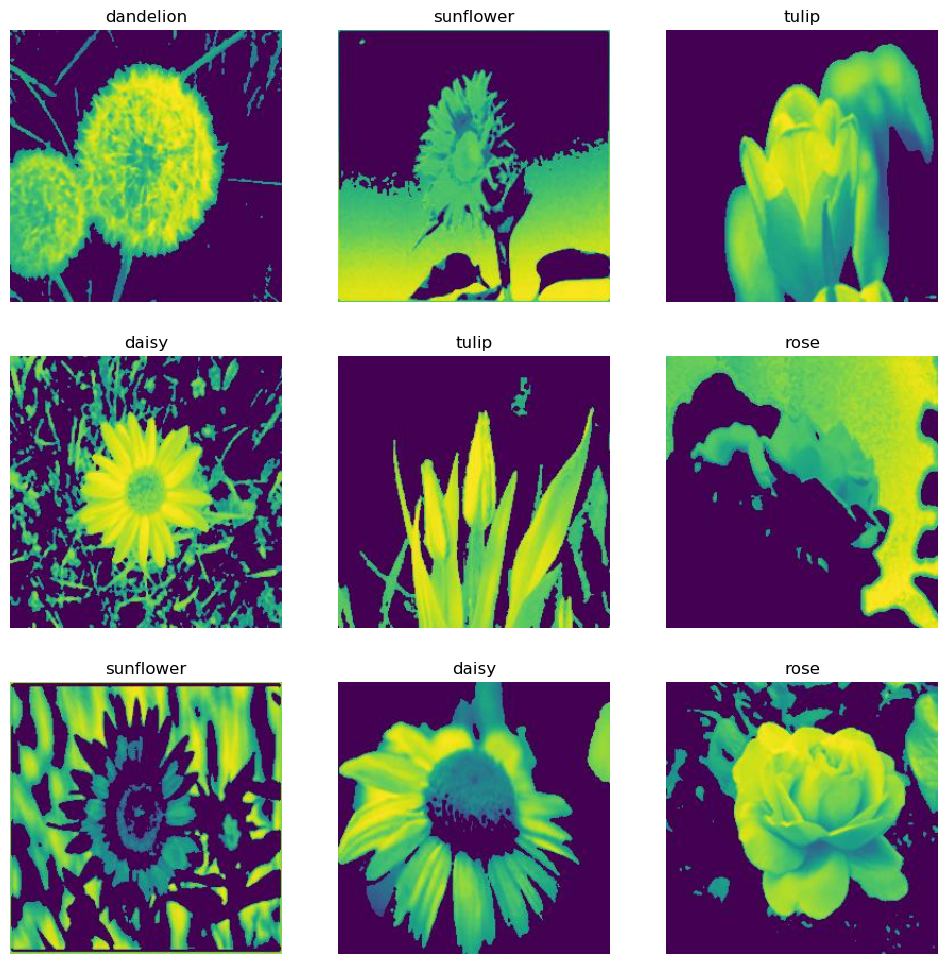

In [8]:
plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1):
      for i in range(9):
            ax = plt.subplot(3,3,i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

In [9]:
Flowers = glob('./Dataset/*/*',recursive=True)

In [10]:
Dataset = []
Labels = []
for I in Flowers:
    ImagemLida = load_img(I,target_size=(250,250))
    ImagemNP = np.array(ImagemLida,dtype='float')
    Dataset.append(ImagemNP)
    if 'daisy' in I:
        Label = 0
    elif 'dandelion' in I:
        Label = 1    
    elif 'rose' in I:
        Label = 2
    elif 'sunflower' in I:
        Label = 3
    elif 'tulip' in I:
        Label = 4
    Labels.append(Label)

In [11]:
print(len(Dataset),len(Labels))

500 500


In [12]:
X_Train = Dataset[:80]+Dataset[100:180]+Dataset[200:280]+Dataset[300:380]+Dataset[400:480]
Y_Train = Labels[:80]+Labels[100:180]+Labels[200:280]+Labels[300:380]+Labels[400:480]
X_Test = Dataset[80:100]+Dataset[180:200]+Dataset[280:300]+Dataset[380:400]+Dataset[480:500]
Y_Test = Labels[80:100]+Labels[180:200]+Labels[280:300]+Labels[380:400]+Labels[480:500]

In [13]:
X_Train = np.array(X_Train,dtype="float") / 255.0
X_Test = np.array(X_Test,dtype="float") / 255.0

In [14]:
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [15]:
Index1 = np.random.permutation(400)
Index2 = np.random.permutation(100)
X_Train, Y_Train = X_Train[Index1], Y_Train[Index1]
X_Test, Y_Test = X_Test[Index2], Y_Test[Index2]

In [16]:
model = Sequential()
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(250,250,3),name='layer_conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='layer_pool1'))
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu',name='layer_conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='layer_pool2'))
model.add(Flatten(name='layer_flatten'))
model.add(Dropout(rate=0.75,name='layer_drop'))
model.add(Dense(units=256, activation='relu',name='layer_fc1'))
model.add(Dense(units=128, activation='relu',name='layer_fc2'))
model.add(Dense(units=5, activation = 'softmax',name='layer_softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_conv1 (Conv2D)        (None, 248, 248, 64)      1792      
                                                                 
 layer_pool1 (MaxPooling2D)  (None, 124, 124, 64)      0         
                                                                 
 layer_conv2 (Conv2D)        (None, 122, 122, 64)      36928     
                                                                 
 layer_pool2 (MaxPooling2D)  (None, 61, 61, 64)        0         
                                                                 
 layer_flatten (Flatten)     (None, 238144)            0         
                                                                 
 layer_drop (Dropout)        (None, 238144)            0         
                                                                 
 layer_fc1 (Dense)           (None, 256)               6

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(0.0001), metrics=['accuracy'])

In [19]:
EPOCHS = 30
BATCH_SIZE = 64

In [20]:
X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(X_Train, Y_Train, test_size = 0.2)
train_generator = ImageDataGenerator().flow(X_Train, Y_Train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_Validation, Y_Validation, batch_size=BATCH_SIZE)

In [ ]:
steps_per_epoch = X_Train.shape[0]//BATCH_SIZE
validation_steps = X_Validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/30


2023-03-20 20:07:50.510896: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1007681536 exceeds 10% of free system memory.
2023-03-20 20:07:54.325324: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 503840768 exceeds 10% of free system memory.
2023-03-20 20:07:54.325397: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1007681536 exceeds 10% of free system memory.


In [ ]:
score = model.evaluate(X_Test, Y_Test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])